In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('census_income.csv')

In [3]:
data.shape

(32560, 15)

In [4]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<strong>We are dealing with a classification Problem here in which we predict whether a person's income is greater than 50k or not</strong>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<strong>Information About Columns
    <ul>
        <li>Age || Age of Citizen || Ordinal </li>
        <li>Workclass || Categorical</li>
        <li>Fnlwgt || Continuos </li>
        <li>Education || Categorical</li>
        <li>Education_num || Ordinal</li>
        <li>Marital_status || Categorical</li>
        <li>Occupation ||| Categorical</li>
        <li>RelationShip || Categorical </li>
        <li>Race || Categorical</li>
        <li>Sex || Categorical</li>
        <li>Capital_gain || Continuos</li>
        <li>Capital_loss || Continuos</li>
        <li>Hours_per_week || Continuos</li>
        <li>Native_country || Categorical</li>
        <li>Income || Categorical || Target Variable</li>
    </ul>
</strong>

In [7]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
num_cols = ['Age', 'Education_num','Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
cat_cols = [col for col in data.columns if col not in num_cols]

<h3>Exploratory Data Analysis</h3>

<h4>StripPlots</h4>

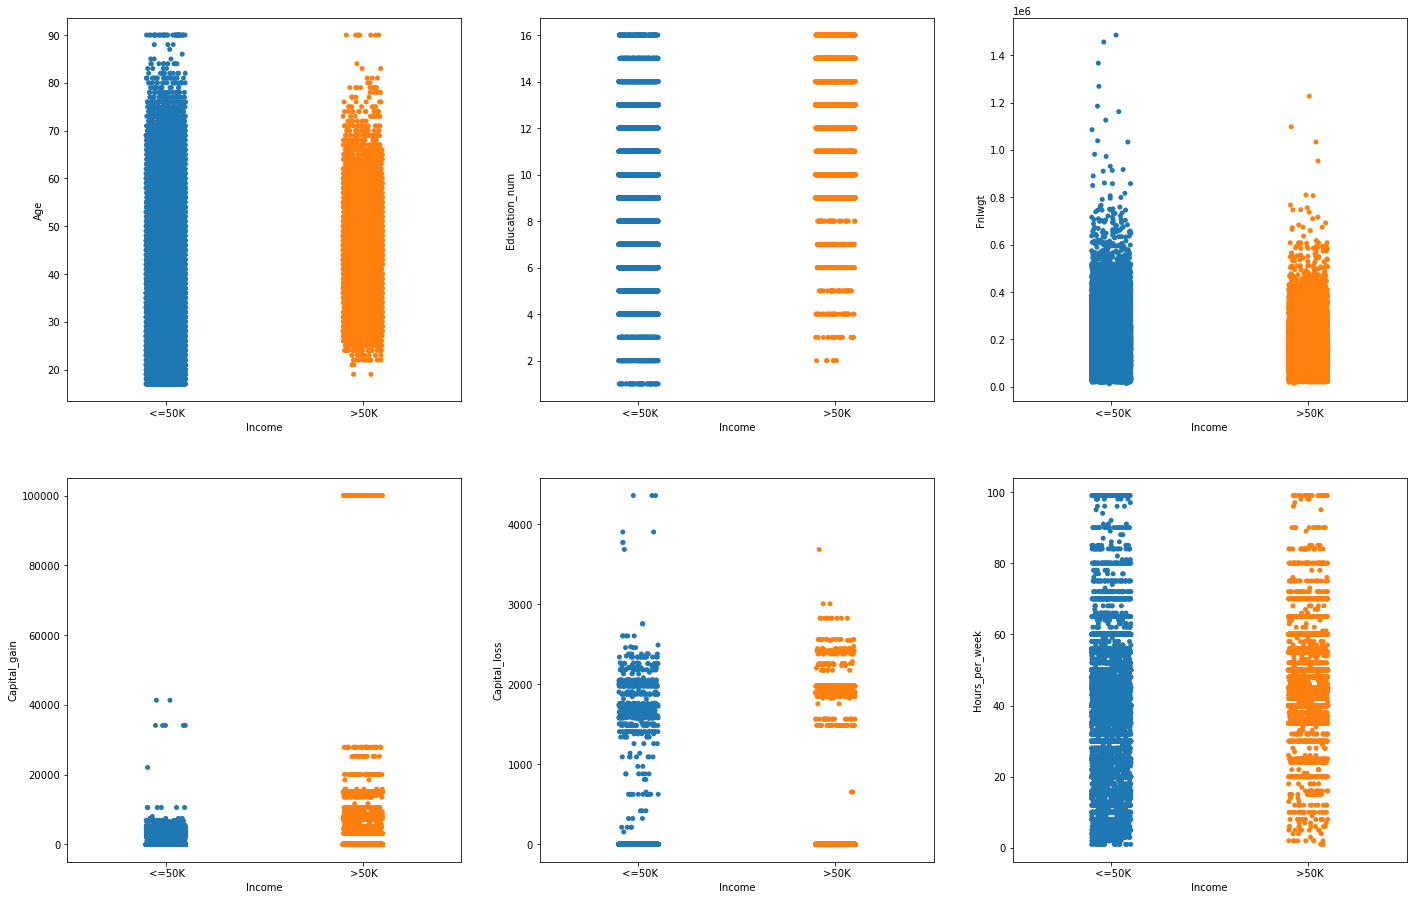

In [9]:
plt.figure(figsize=(24,24))

plotnumber = 1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.stripplot('Income', col, data=data)
    plotnumber+=1

<strong>
    <ul>
        <li>if age is below 25, chances are that income is below 50k</li>
        <li>if education_num is below 2, chances are that income is below 50K</li>
        <li>if capital_gain is higher than 60000, chances are high that income is above 50k</li>
    </ul>
</strong>

<h4>KDE Plot</h4>

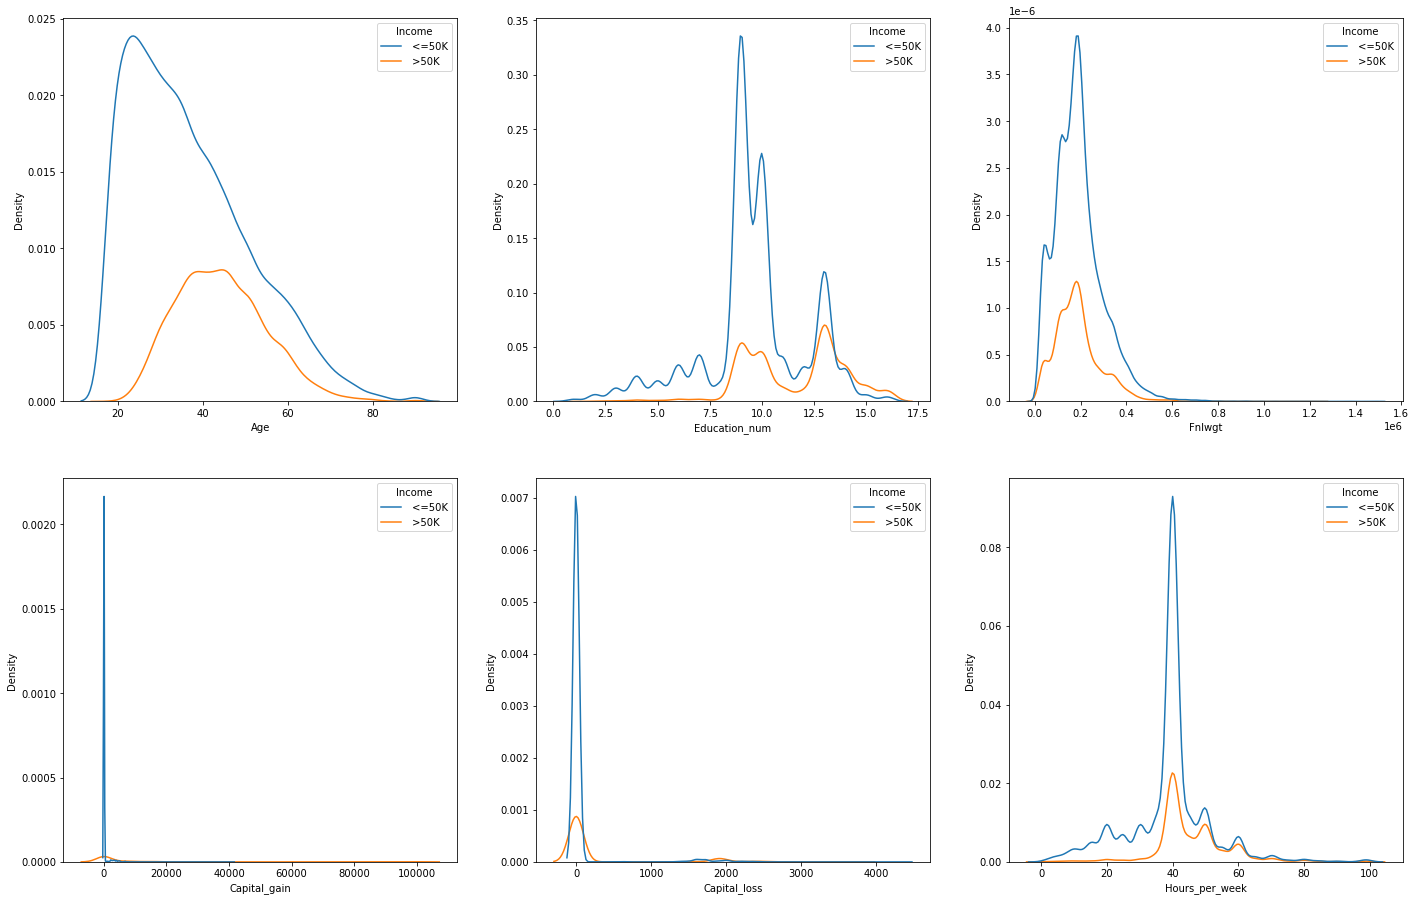

In [10]:
plt.figure(figsize=(24,24))

plotnumber = 1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.kdeplot(col,hue='Income', data=data)
    plotnumber+=1

<li>We can see one thing here that there are lot of 0 values in captial_gain and captital_loss , these values will be Nan as both variable cannot be zeor</li>

In [11]:
data['Capital_gain'] = data['Capital_gain'].replace(0, np.nan)

In [12]:
data['Capital_loss'] = data['Capital_loss'].replace(0, np.nan)

In [13]:
data.isnull().sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

<strong>We can see that there are more than 90% missing values in both ther variable, we can drop these calues</strong>

In [14]:
data = data.drop(columns=['Capital_loss', 'Capital_gain'])

In [17]:
num_cols = ['Age', 'Education_num','Fnlwgt', 'Hours_per_week']

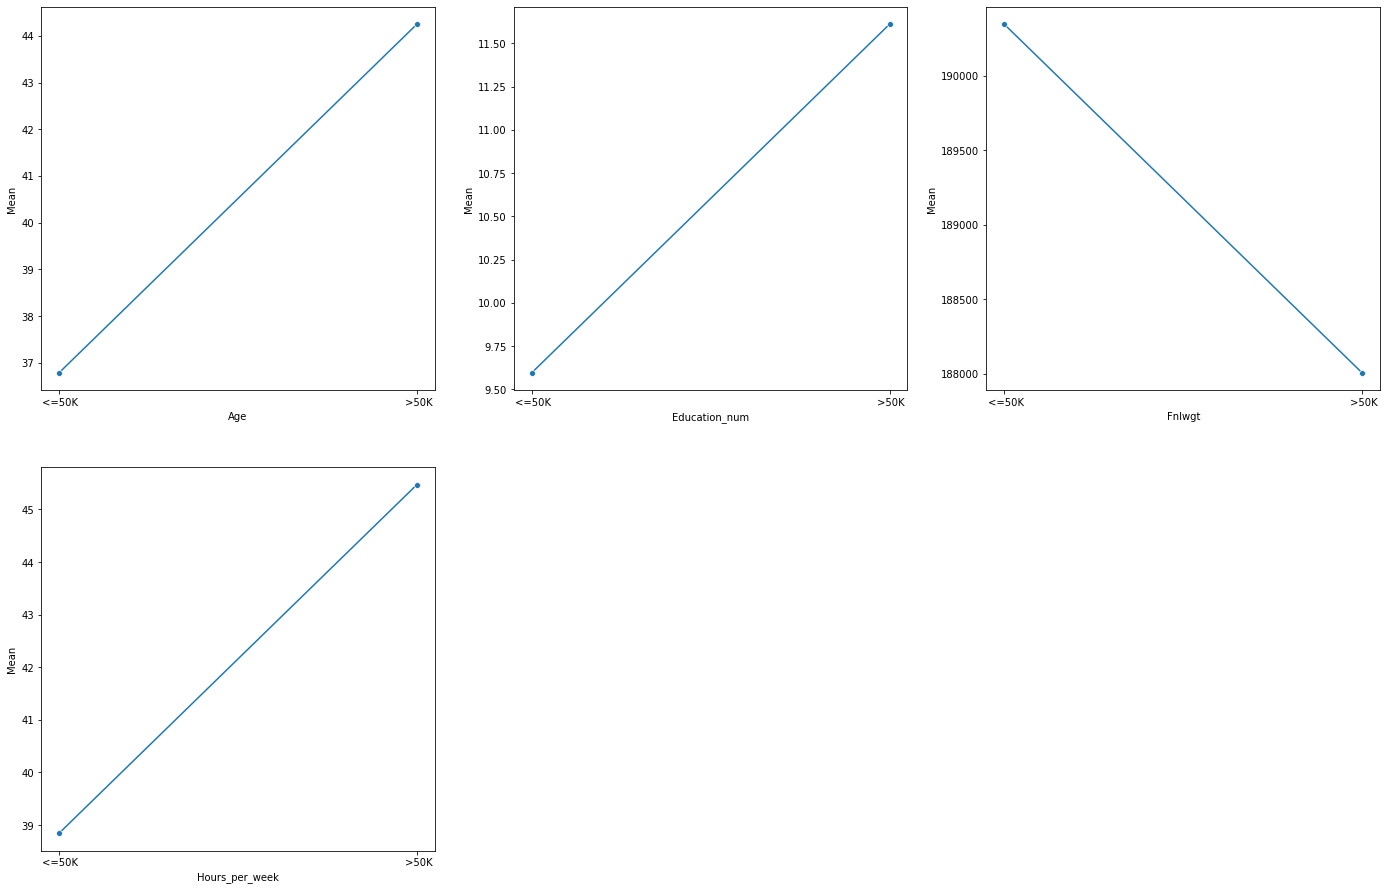

In [18]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    mean_vals = pd.DataFrame()
    unique_val = data['Income'].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data['Income'] == val]
        mean_val = mean_val[col].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(3,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

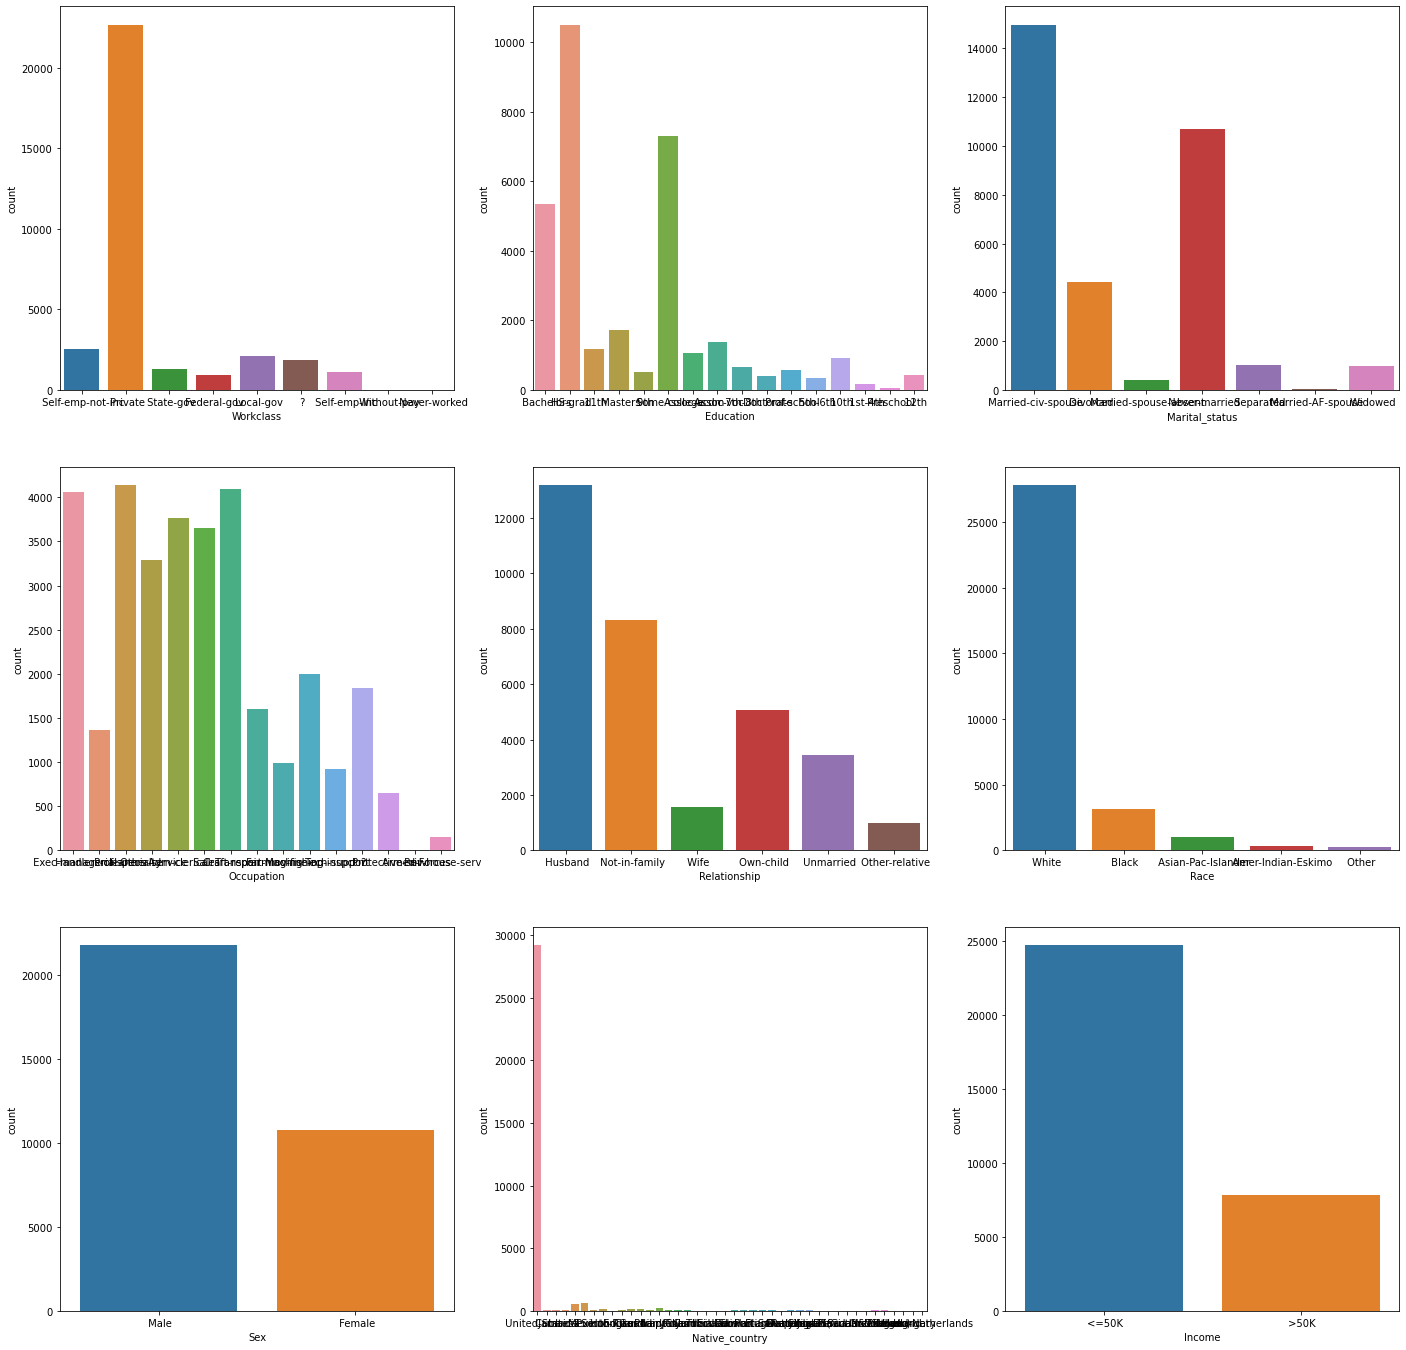

In [19]:
plt.figure(figsize=(24,24))

plotnumber = 1
for col in cat_cols:
    plt.subplot(3,3,plotnumber)
    sns.countplot(data[col])
    plotnumber+=1

In [46]:
data['Income'] = data['Income'].replace('<=50K', 0, regex=True)

In [48]:
data['Income'] = data['Income'].replace('>50K',1, regex=True)

In [50]:
income_0 = data[data['Income'] == 0]
income_1 = data[data['Income']==1]

In [51]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0


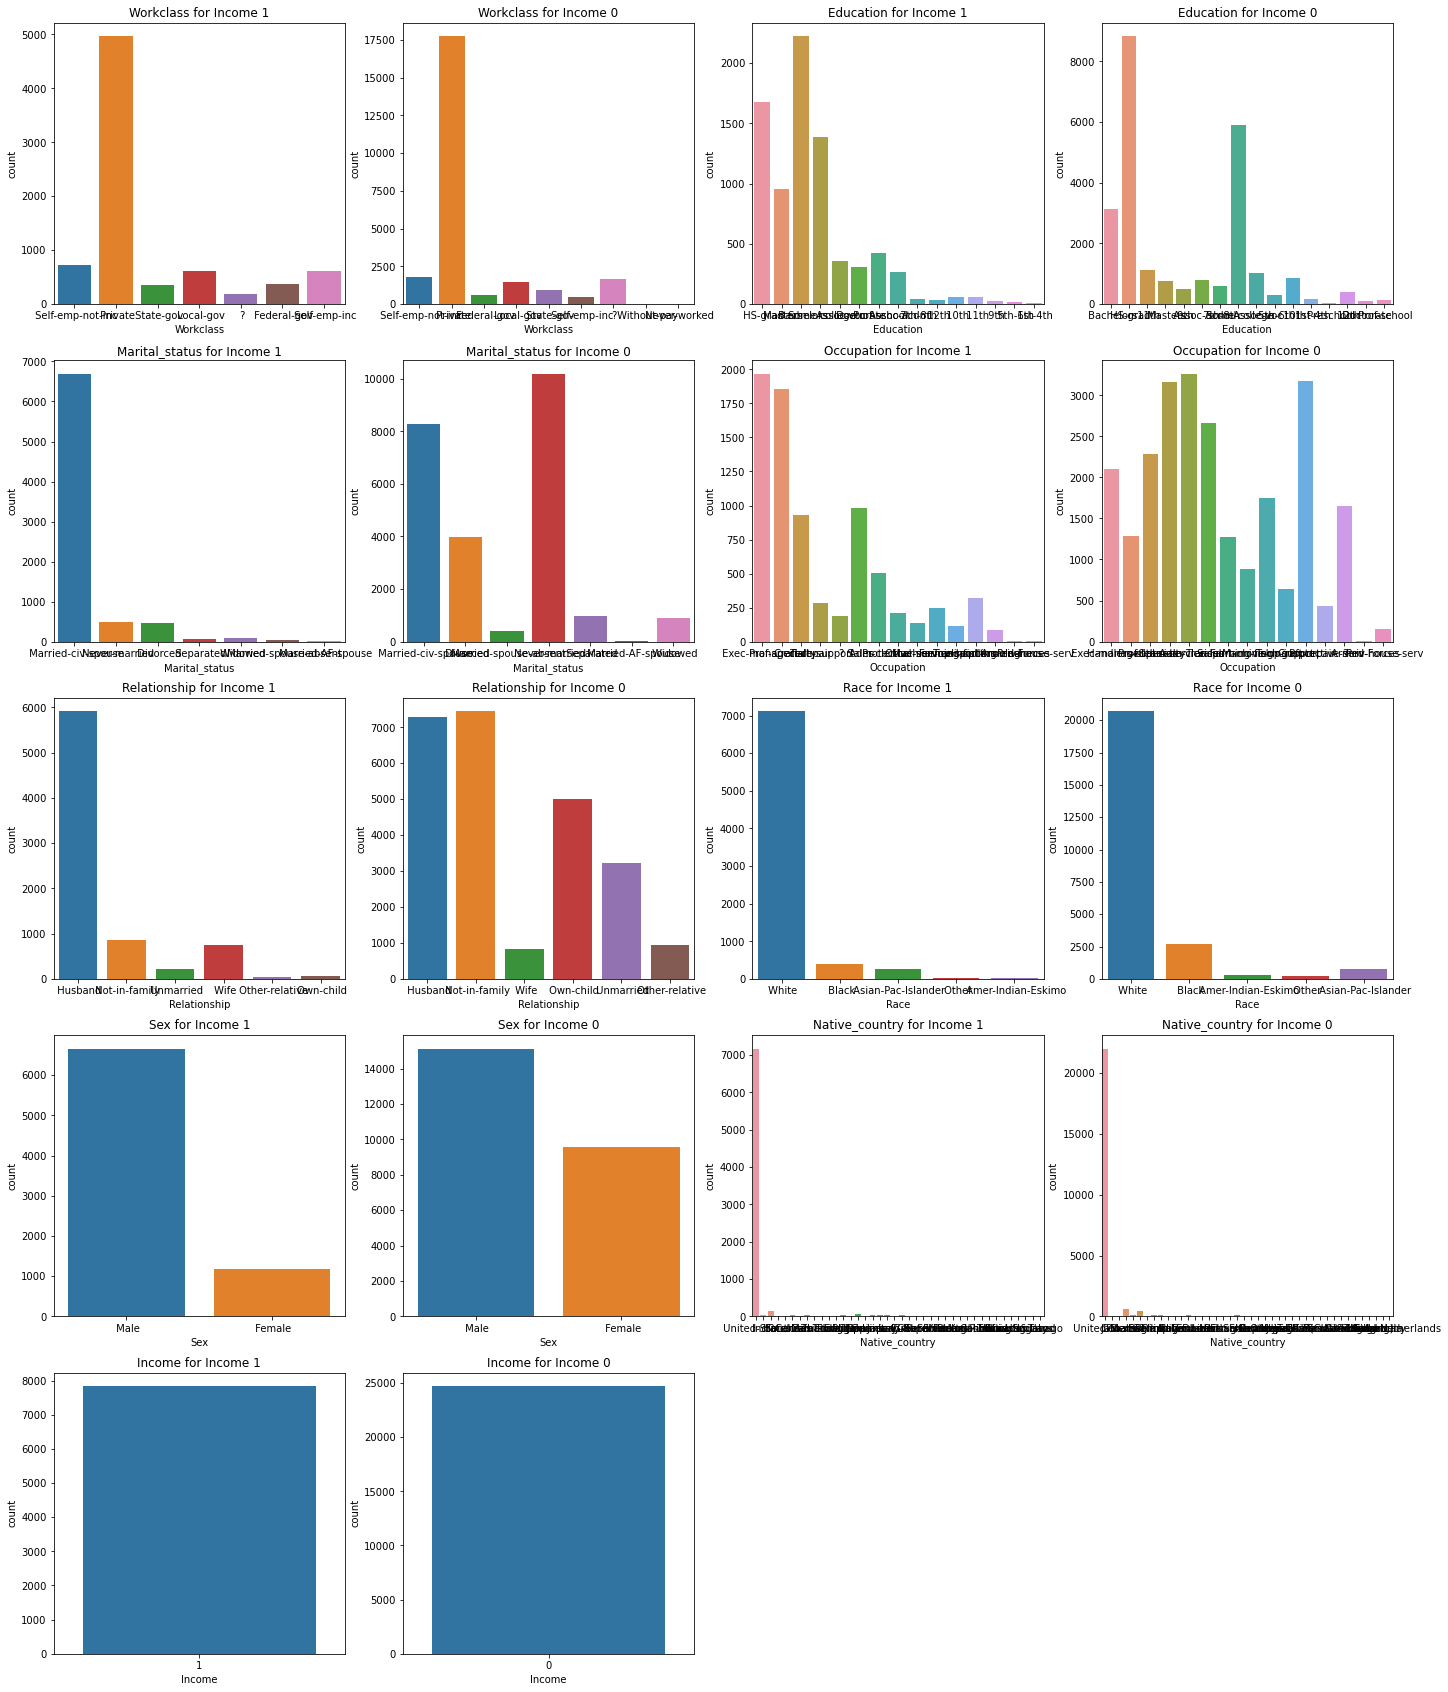

In [55]:
plt.figure(figsize=(24,30))

plotnumber = 1
for col in cat_cols:
    plt.subplot(5,4,plotnumber)
    sns.countplot(income_1[col])
    plt.title(f'{col} for Income 1')
    plotnumber+=1
    plt.subplot(5,4,plotnumber)
    sns.countplot(income_0[col])
    plt.title(f'{col} for Income 0')
    plotnumber+=1
    

<strong>
    <ul>
        <li>Separate People are more likley to have low income</li>
        <li>Own Child and not in family are more likley to have low income</li>
        <li>Females are more likely to have low income</li>
    </ul>
</strong>

<strong>There are lot of ? values in our data, we can treat them as Nan</strong>

In [63]:
data = data.replace(' ?', np.nan)

In [66]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<h4>Correlation Matrix</h4>

In [68]:
data.corr()

,Age,Fnlwgt,Education_num,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.148127,0.335182
Hours_per_week,0.068756,-0.018770,0.148127,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.229690,1.000000


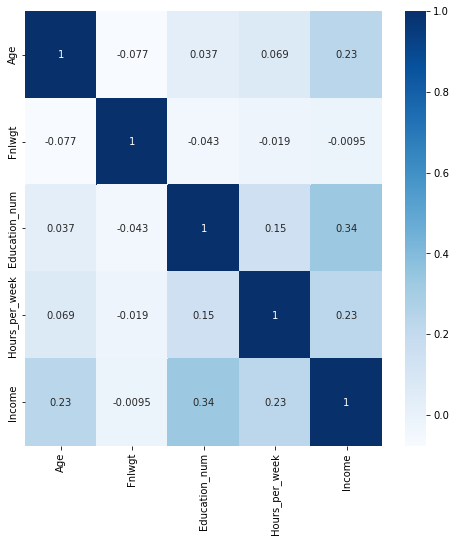

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

<strong>No varibales have very high correlation among each other</strong>

In [70]:
data.describe()

,Age,Fnlwgt,Education_num,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,1.000000


<ul>
    <li>Age
        <ul>
            <li>Mean -: 38.581634</li>
            <li>STD -: 13.640642</li>
            <li>Min -: 17.000000</li>
            <li>Max -: 90.000000</li>
        </ul>
    </li>
    <li>Fnlwgt
        <ul>
            <li>Mean -: 1.897818e+05</li>
            <li>STD -: 1.055498e+05</li>
            <li>Min -: 1.228500e+04</li>
            <li>Max -: 1.484705e+06</li>
        </ul>
    </li>
    <li>Education_num
        <ul>
            <li>Mean -: 10.080590</li>
            <li>STD -: 2.572709</li>
            <li>Min -: 1.000000</li>
            <li>Max -: 16.000000</li>
        </ul>
    </li>
    <li>Hours_per_week
        <ul>
            <li>Mean -: 40.437469</li>
            <li>STD -: 12.347618</li>
            <li>Min -: 1.000000</li>
            <li>Max -: 99.000000</li>
        </ul>
    </li>
    <li>Income
        <ul>
            <li>Min -: 0</li>
            <li>Max -: 1</li>
        </ul>
    </li>
</ul>

<Figure size 720x720 with 0 Axes>

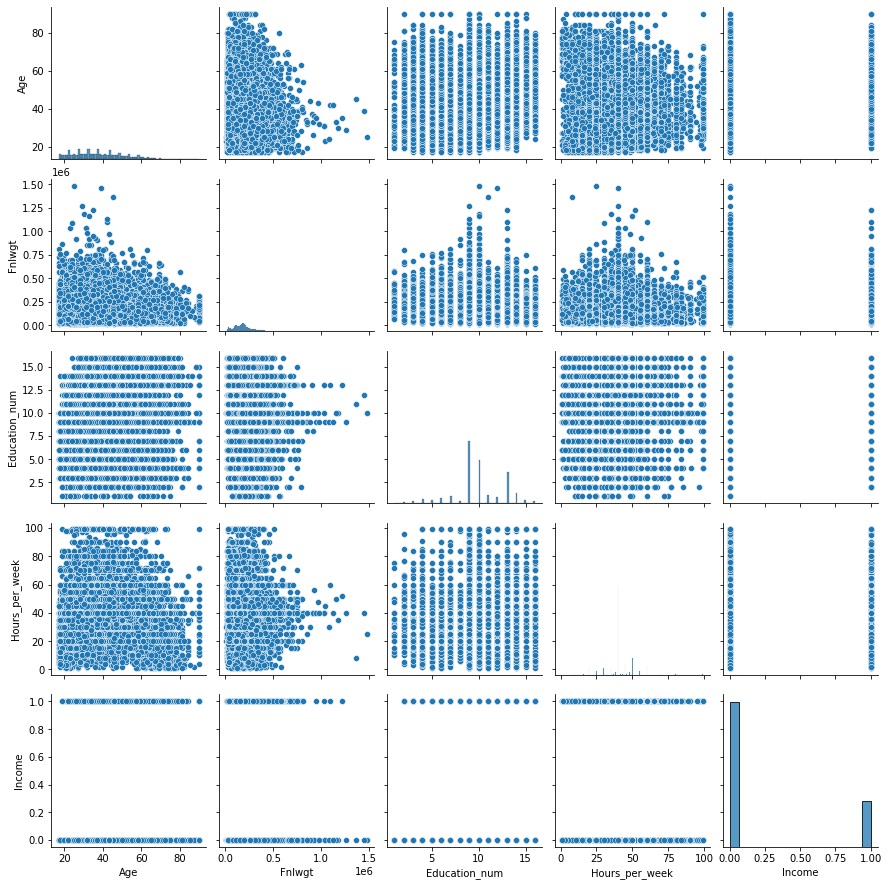

In [73]:
plt.figure(figsize=(10,10))
sns.pairplot(data)

<h3>handling Outliers</h3>

In [74]:
num_cols = ['Age', 'Education_num','Fnlwgt', 'Hours_per_week']
X = data[num_cols]

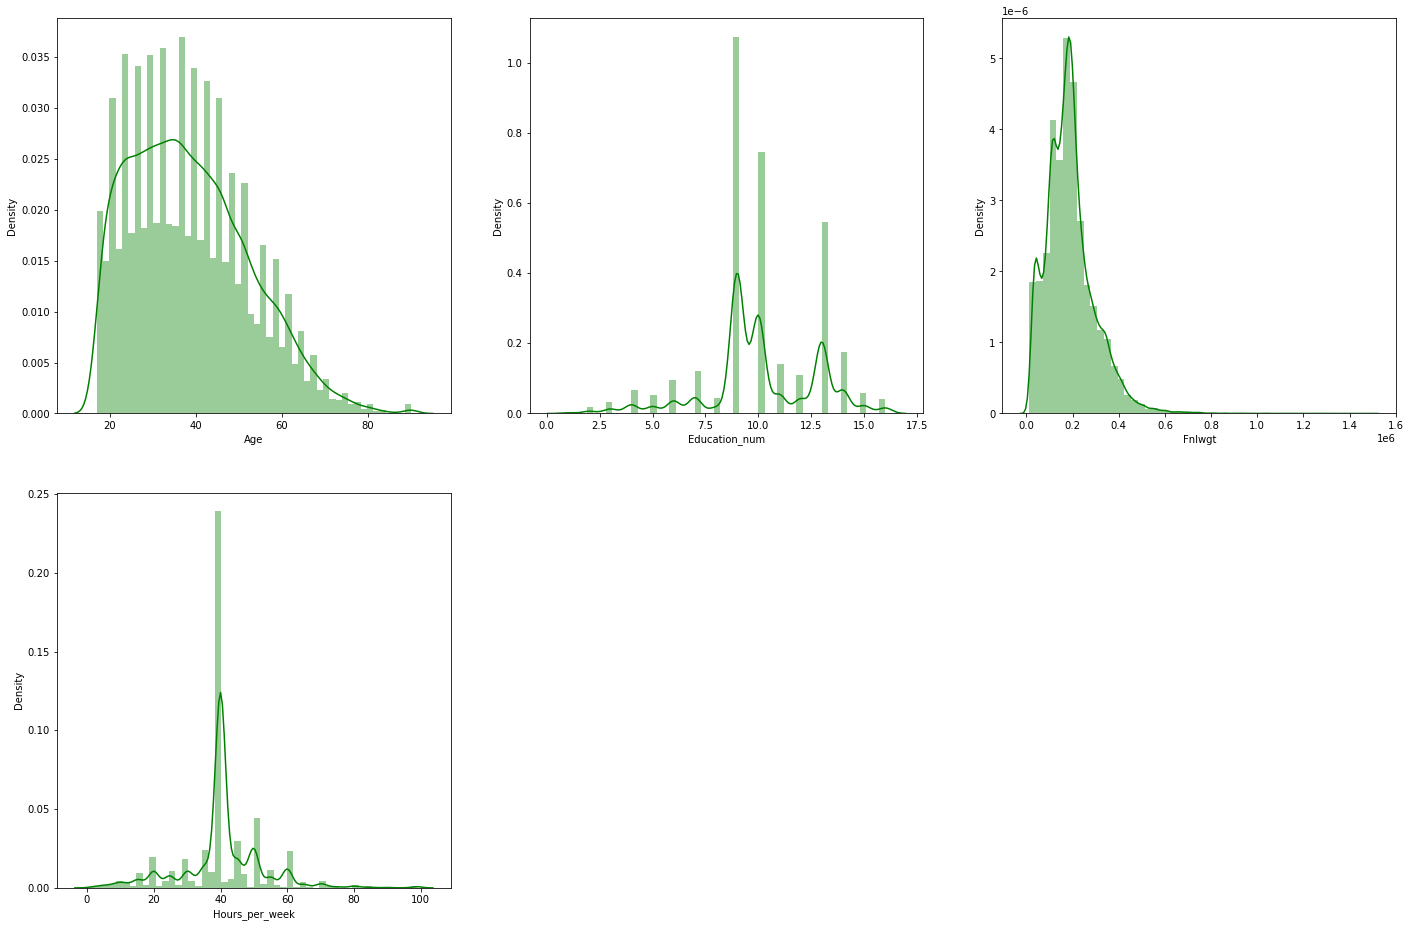

In [77]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in num_cols:
    plt.subplot(2,3, plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

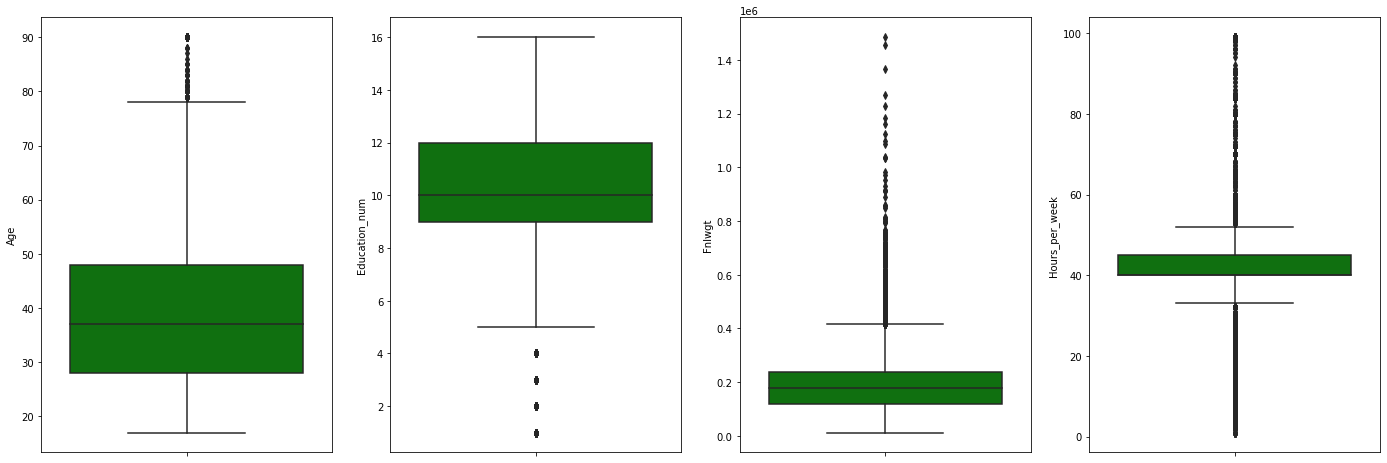

In [78]:
plt.figure(figsize=(24,8))
plotnumber=1
for col in num_cols:
    plt.subplot(1,4, plotnumber)
    sns.boxplot(y=X[col], color='green')
    plotnumber+=1

In [82]:
X.skew()

Age               0.558738
Education_num    -0.311630
Fnlwgt            1.446972
Hours_per_week    0.227636
dtype: float64

<strong>Most outliers are present in Fnlwgt and Hours_per_week</strong>

<h4>Using z-score texhnique</h4>

In [79]:


from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(32560, 4)
Old Shape (32560, 13)
New Shape (31461, 13)
Total Dropped Rows 1099


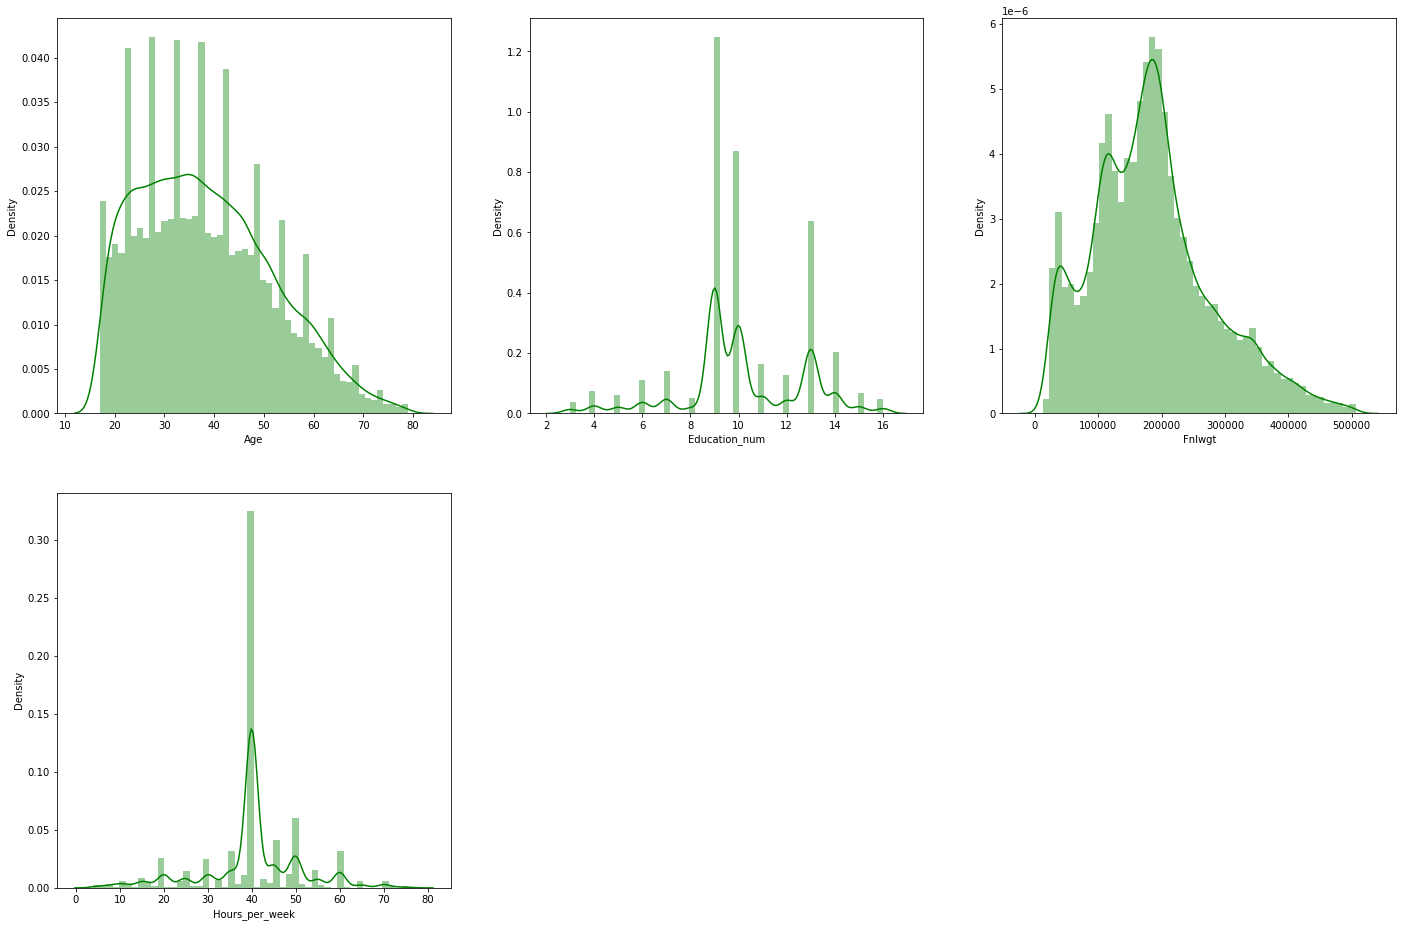

In [81]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in num_cols:
    plt.subplot(2,3, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [83]:
data_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
Income            1.205962
dtype: float64

<h4>Power Transform</h4>

In [84]:
from sklearn.preprocessing import power_transform
X = data_new[num_cols]
for col in num_cols:
    data_new[col] = power_transform(np.array(data_new[col]).reshape(-1,1), method='yeo-johnson').reshape(31461,)

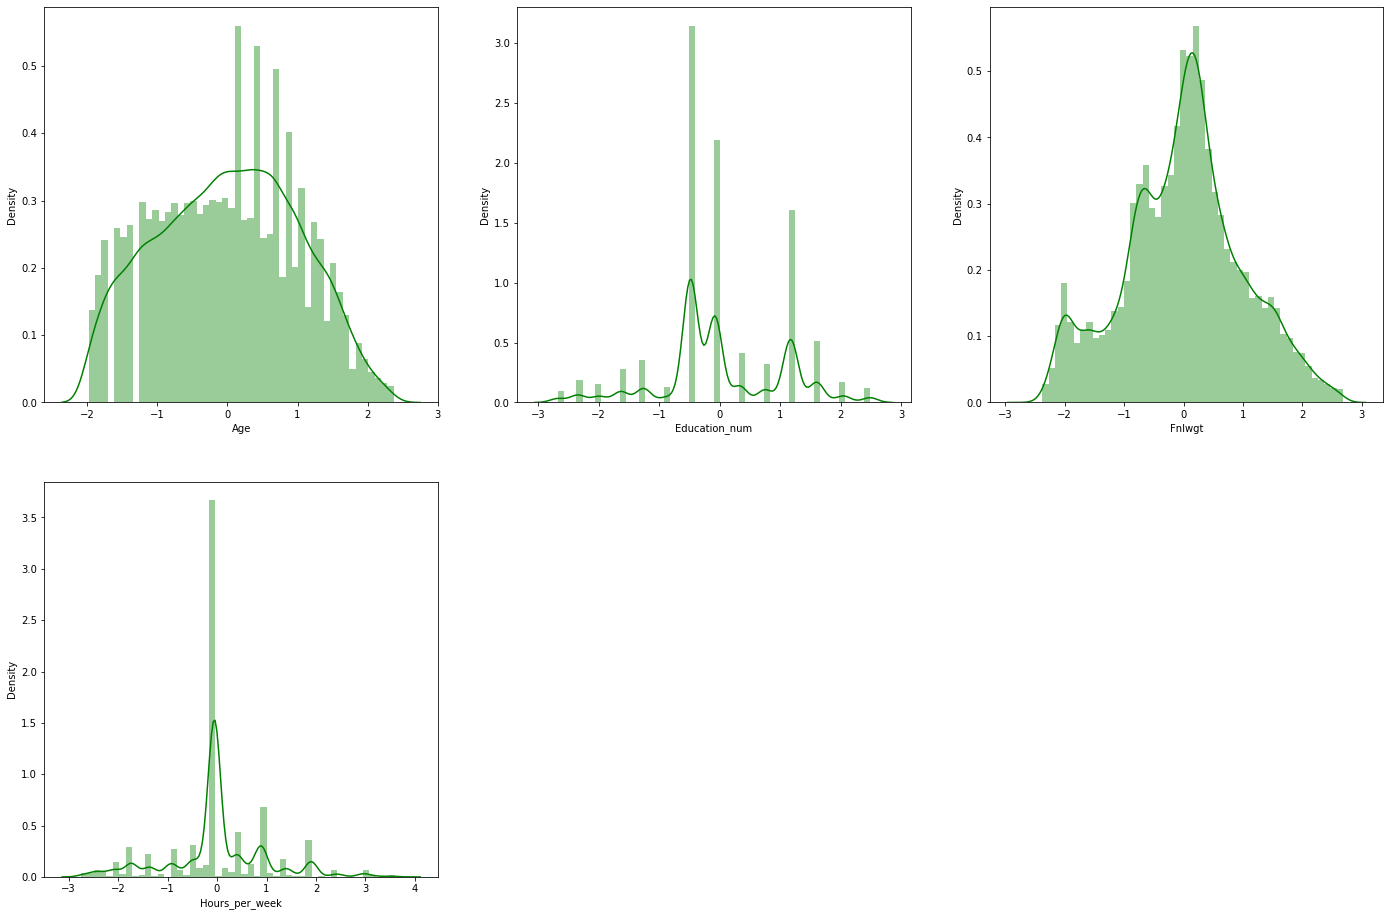

In [85]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in num_cols:
    plt.subplot(2,3, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [86]:
data_new.skew()

Age              -0.019700
Fnlwgt           -0.034507
Education_num     0.019910
Hours_per_week    0.107284
Income            1.205962
dtype: float64

<strong>Skewness is removed for all columns</strong>

<h4>Scaling the data</h4>

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for col in num_cols:
    data_new[col] = sc.fit_transform(np.array(data_new[col]).reshape(-1,1)).reshape(31461,)

In [89]:
data_new[num_cols].isnull().sum()

Age               0
Education_num     0
Fnlwgt            0
Hours_per_week    0
dtype: int64

In [94]:
X = data_new.drop(columns=['Income'])
y = data_new['Income']

<h4>Encoding using get dummies</h4>

In [95]:
X = pd.get_dummies(X, dummy_na=False)

In [96]:
X.shape

(31461, 101)

In [97]:
X

,Age,Fnlwgt,Education_num,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.915570,-1.114171,1.169524,-2.228173,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.109856,0.427192,-0.483417,-0.053366,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.093043,0.607320,-1.260281,-0.053366,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.729959,1.487719,1.169524,-0.053366,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.034167,1.048962,1.600383,-0.053366,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.826095,0.812145,0.745287,-0.235369,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0.256719,-0.207385,-0.483417,-0.053366,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,1.372134,-0.235114,-0.483417,-0.053366,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,-1.352384,0.288776,-0.483417,-1.732436,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<h4>Checking for mulitcollinearity</h4>

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(5, 'vif')

,vif,Features
3,1.048808,Hours_per_week
1,1.033143,Education_num
0,1.032140,Age
2,1.005047,Fnlwgt


<strong>No mulitcollinearity probelm</strong>

<h4>OverSampling</h4>

In [99]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [100]:
print(X.shape)
print(y.shape)

(47706, 101)
(47706,)


<h3>Building and Trainig Models</h3>

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_auc_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(38164, 101)
(9542, 101)


<h3>Logistic regression</h3>

In [102]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8438842888586102
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     17647
           1       0.88      0.82      0.85     20517

    accuracy                           0.84     38164
   macro avg       0.84      0.85      0.84     38164
weighted avg       0.85      0.84      0.84     38164


Testing Accuracy : 0.8426954516872773
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      4389
           1       0.88      0.82      0.85      5153

    accuracy                           0.84      9542
   macro avg       0.84      0.85      0.84      9542
weighted avg       0.85      0.84      0.84      9542



Text(33.0, 0.5, 'Predicted')

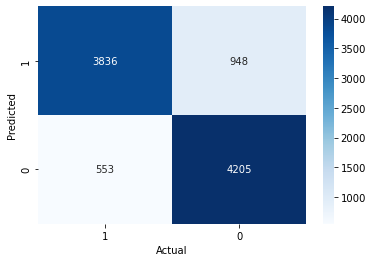

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

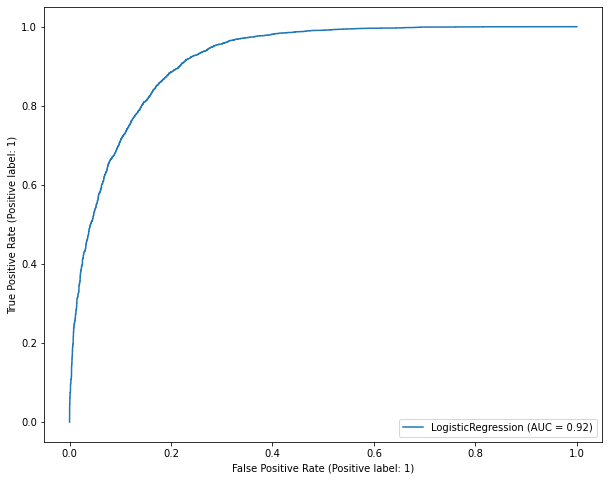

In [104]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)

<h4>hyperParameter Tuning</h4>

In [105]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best Score: 0.8421548627971142
Best Params: {'dual': False, 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}


In [106]:
lrcv = LogisticRegression(max_iter=300)

lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8437008699297768
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     17626
           1       0.88      0.82      0.85     20538

    accuracy                           0.84     38164
   macro avg       0.84      0.85      0.84     38164
weighted avg       0.85      0.84      0.84     38164


Testing Accuracy : 0.8423810521903164
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      4384
           1       0.88      0.82      0.85      5158

    accuracy                           0.84      9542
   macro avg       0.84      0.84      0.84      9542
weighted avg       0.85      0.84      0.84      9542



Text(33.0, 0.5, 'Predicted')

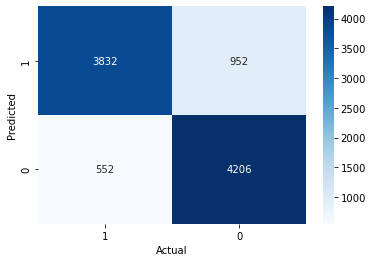

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

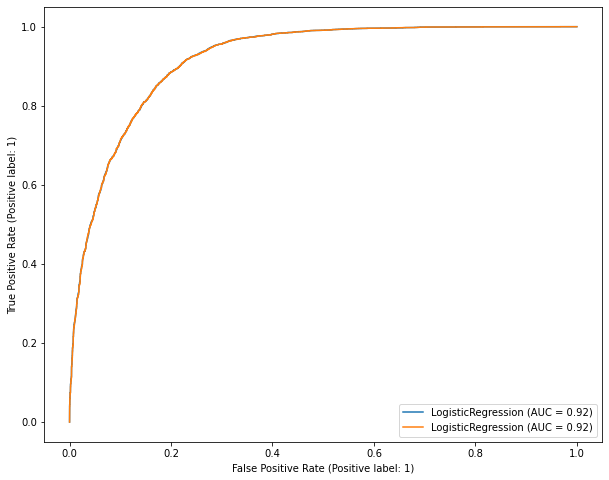

In [108]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)

<h3>KNeighbors Classifier</h3>

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Training Accuracy :  0.8907871292317368
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88     16287
           1       0.96      0.84      0.90     21877

    accuracy                           0.89     38164
   macro avg       0.89      0.90      0.89     38164
weighted avg       0.90      0.89      0.89     38164


Testing Accuracy : 0.845315447495284
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83      3940
           1       0.93      0.79      0.86      5602

    accuracy                           0.85      9542
   macro avg       0.85      0.86      0.84      9542
weighted avg       0.86      0.85      0.85      9542



Text(33.0, 0.5, 'Predicted')

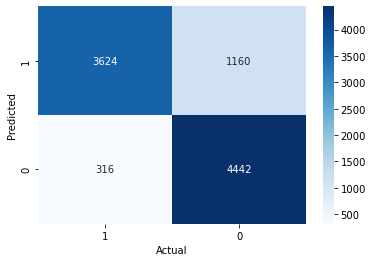

In [110]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

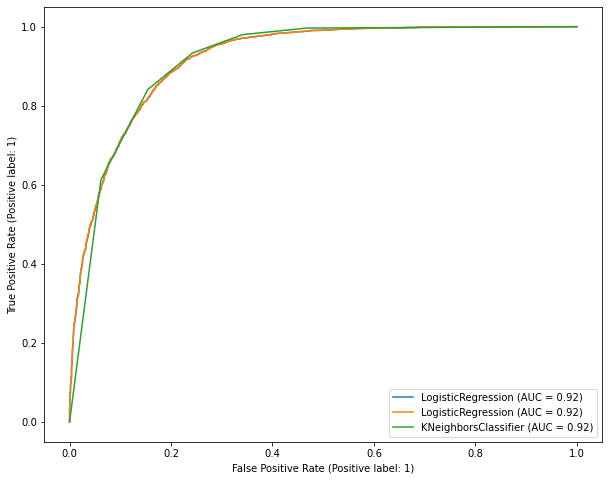

In [111]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)

In [115]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7],
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Score: nan
Best Params: {'n_neighbors': 3}


In [116]:
knncv = KNeighborsClassifier(n_neighbors=3)
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9177759144743738
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     16897
           1       0.97      0.88      0.92     21267

    accuracy                           0.92     38164
   macro avg       0.92      0.92      0.92     38164
weighted avg       0.92      0.92      0.92     38164


Testing Accuracy : 0.8518130370991407
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      3966
           1       0.94      0.80      0.86      5576

    accuracy                           0.85      9542
   macro avg       0.85      0.86      0.85      9542
weighted avg       0.87      0.85      0.85      9542



Text(33.0, 0.5, 'Predicted')

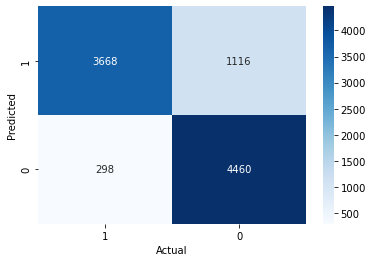

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

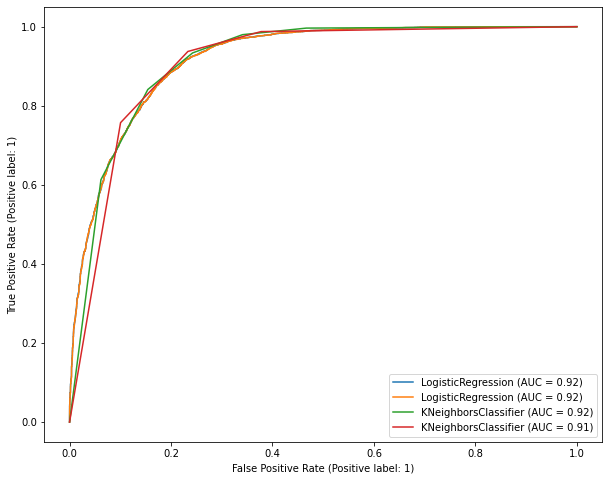

In [118]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)

<h3>DecisionTree Classifier</h3>

In [119]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19069
           1       1.00      1.00      1.00     19095

    accuracy                           1.00     38164
   macro avg       1.00      1.00      1.00     38164
weighted avg       1.00      1.00      1.00     38164


Testing Accuracy : 0.8301194718088452
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      4631
           1       0.85      0.82      0.83      4911

    accuracy                           0.83      9542
   macro avg       0.83      0.83      0.83      9542
weighted avg       0.83      0.83      0.83      9542



Text(33.0, 0.5, 'Predicted')

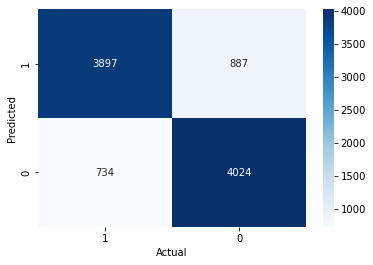

In [120]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

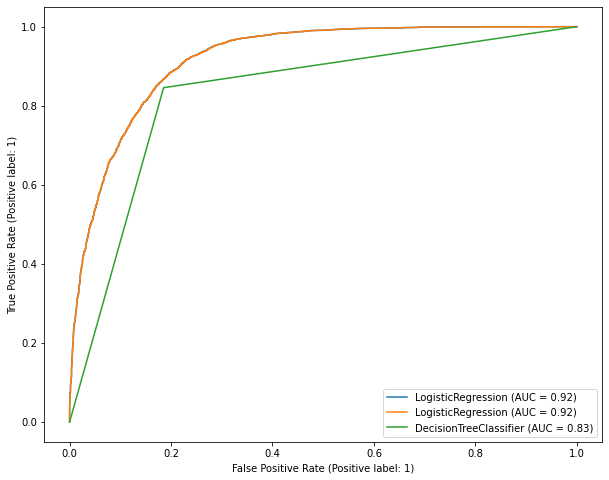

In [121]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)

<h4>hyperParameter Tuning</h4>

In [125]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None,14,15,16,17,18],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5,6,7],
    'max_leaf_nodes':[55,60,65,70, None]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Best Score: 0.8282413257559602
Best Params: {'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'best'}


In [126]:
dtcv = DecisionTreeClassifier(criterion='gini', max_depth=15, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=4, splitter='best')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.879257939419348
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     17029
           1       0.93      0.84      0.89     21135

    accuracy                           0.88     38164
   macro avg       0.88      0.88      0.88     38164
weighted avg       0.88      0.88      0.88     38164


Testing Accuracy : 0.8386082582267869
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      4234
           1       0.90      0.80      0.85      5308

    accuracy                           0.84      9542
   macro avg       0.84      0.84      0.84      9542
weighted avg       0.85      0.84      0.84      9542



Text(33.0, 0.5, 'Predicted')

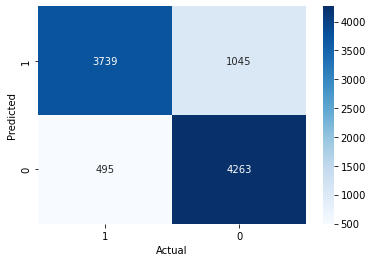

In [127]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

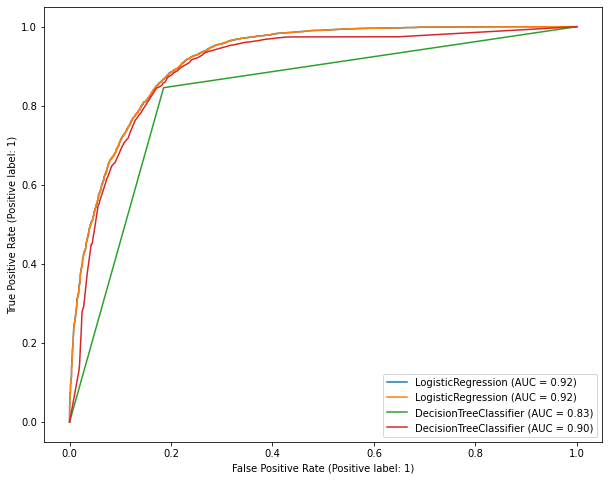

In [128]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)

<h4>RandomForestClassifier</h4>

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19069
           1       1.00      1.00      1.00     19095

    accuracy                           1.00     38164
   macro avg       1.00      1.00      1.00     38164
weighted avg       1.00      1.00      1.00     38164


Testing Accuracy : 0.8786417941731294
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.85      0.91      0.87      4462
           1       0.91      0.85      0.88      5080

    accuracy                           0.88      9542
   macro avg       0.88      0.88      0.88      9542
weighted avg       0.88      0.88      0.88      9542



Text(33.0, 0.5, 'Predicted')

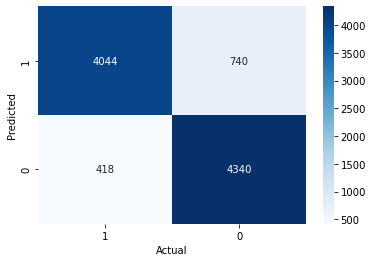

In [130]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

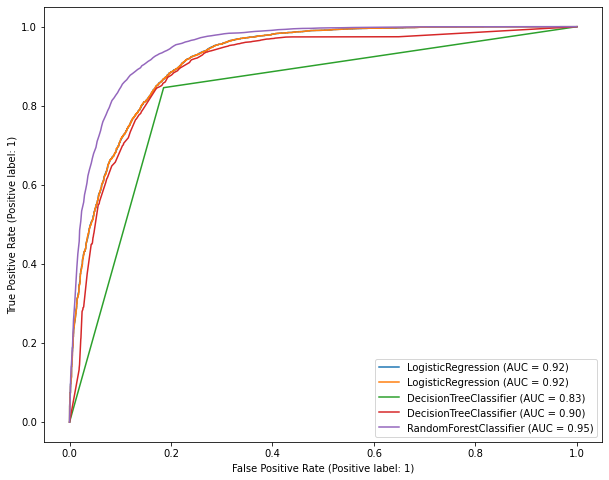

In [131]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [136]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[100],
    'max_depth':[None,15],
    'min_samples_split':[4],
    'min_samples_leaf':[4],
    'max_leaf_nodes':[None,60],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Score: 0.8409757720055042
Best Params: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100, 'n_jobs': -1}


In [137]:
rfcv = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=100)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8646630332250288
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     17288
           1       0.91      0.83      0.87     20876

    accuracy                           0.86     38164
   macro avg       0.86      0.87      0.86     38164
weighted avg       0.87      0.86      0.86     38164


Testing Accuracy : 0.8489834416264934
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      4263
           1       0.90      0.81      0.86      5279

    accuracy                           0.85      9542
   macro avg       0.85      0.85      0.85      9542
weighted avg       0.85      0.85      0.85      9542



Text(33.0, 0.5, 'Predicted')

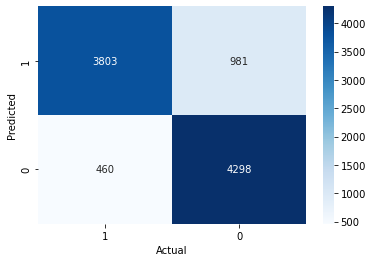

In [138]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

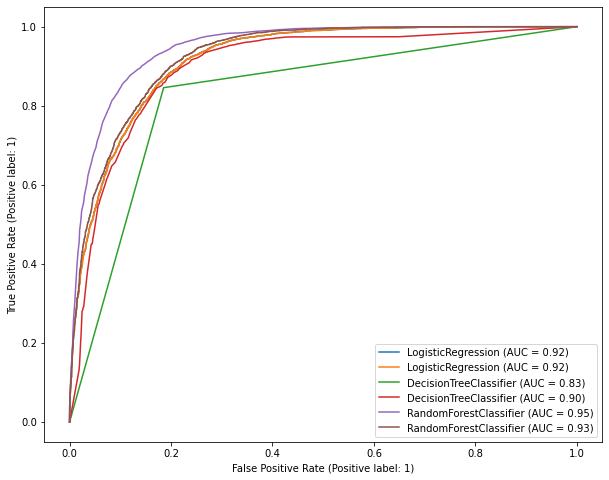

In [139]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)

<strong>Vanilla Random FOrest is best performing</strong>

<h3>AdaBoost Classifier</h3>

In [140]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.835368410019914
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83     17478
           1       0.88      0.81      0.84     20686

    accuracy                           0.84     38164
   macro avg       0.84      0.84      0.84     38164
weighted avg       0.84      0.84      0.84     38164


Testing Accuracy : 0.8357786627541396
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      4337
           1       0.88      0.81      0.84      5205

    accuracy                           0.84      9542
   macro avg       0.84      0.84      0.84      9542
weighted avg       0.84      0.84      0.84      9542



Text(33.0, 0.5, 'Predicted')

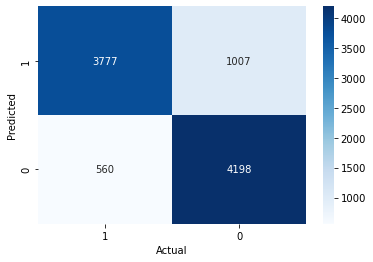

In [141]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

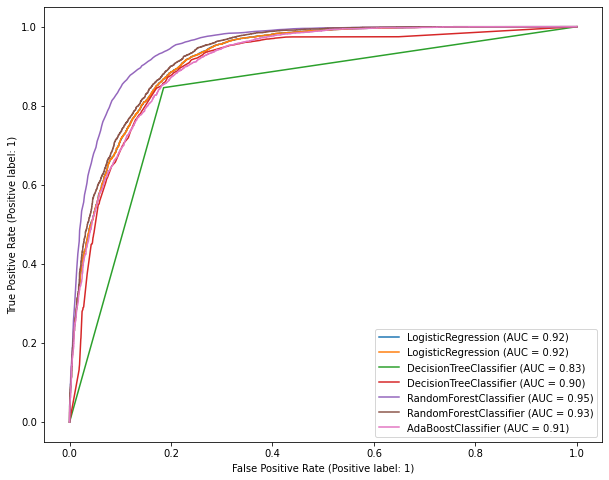

In [142]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [144]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[30,50,70,90,110,130,150],
    'learning_rate':[0.01, 0.05, 0.1,0.3,0.5,0.7, 0.9,1,1.4,1.5]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=3)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV 1/3] END learning_rate=0.01, n_estimators=30;, score=0.760 total time=   1.5s
[CV 2/3] END learning_rate=0.01, n_estimators=30;, score=0.765 total time=   1.6s
[CV 3/3] END learning_rate=0.01, n_estimators=30;, score=0.756 total time=   1.6s
[CV 1/3] END learning_rate=0.01, n_estimators=50;, score=0.760 total time=   2.6s
[CV 2/3] END learning_rate=0.01, n_estimators=50;, score=0.765 total time=   2.6s
[CV 3/3] END learning_rate=0.01, n_estimators=50;, score=0.756 total time=   2.5s
[CV 1/3] END learning_rate=0.01, n_estimators=70;, score=0.760 total time=   3.7s
[CV 2/3] END learning_rate=0.01, n_estimators=70;, score=0.765 total time=   3.6s
[CV 3/3] END learning_rate=0.01, n_estimators=70;, score=0.756 total time=   3.8s
[CV 1/3] END learning_rate=0.01, n_estimators=90;, score=0.774 total time=   4.7s
[CV 2/3] END learning_rate=0.01, n_estimators=90;, score=0.776 total time=   4.6s
[CV 3/3] END learning_rate=0.01, n_e

In [145]:
adcv = AdaBoostClassifier(n_estimators=130, learning_rate=1.4)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8527408028508542
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     17845
           1       0.88      0.83      0.86     20319

    accuracy                           0.85     38164
   macro avg       0.85      0.85      0.85     38164
weighted avg       0.85      0.85      0.85     38164


Testing Accuracy : 0.8513938377698596
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4472
           1       0.88      0.83      0.86      5070

    accuracy                           0.85      9542
   macro avg       0.85      0.85      0.85      9542
weighted avg       0.85      0.85      0.85      9542



Text(33.0, 0.5, 'Predicted')

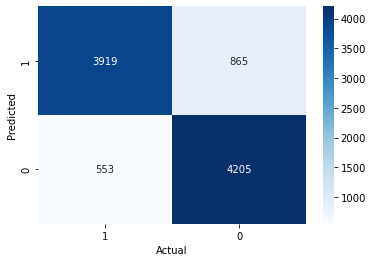

In [146]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

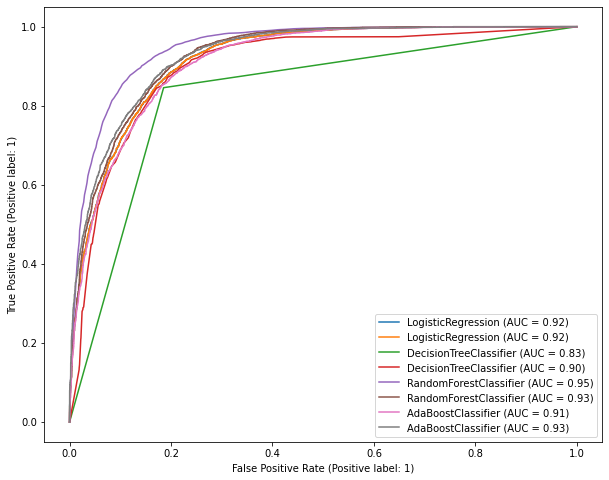

In [147]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)
plot_roc_curve(adcv, X_test, y_test, ax=ax)

<strong>Vanilla RandomForest is the best performing model with roc score of 0.95</strong>

<h3>model Saving</h3>

In [149]:
import pickle
pickle.dump(rf, open('final.pickle', 'wb'))